In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot
import seaborn as sns
import os
import glob
import numpy as np

## Read Data

In [3]:
#Features    
path = r'C:\Users\intan.septiana\Documents\springboard\Capstone project\Dataset\features'                     
all_files = glob.glob(os.path.join(path, "*.csv")) 
df_from_each_file = (pd.read_csv(f) for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [4]:
#Labels
label = pd.read_csv('../Dataset/labels/label.csv')

In [39]:
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [40]:
label.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [41]:
df.shape

(16135561, 11)

In [42]:
label.shape

(20018, 2)

In [43]:
# check unique bookingID
print('features:',df.bookingID.nunique())
print('label:',label.bookingID.nunique())

features: 20000
label: 20000


In [51]:
#check label - features relationship
print('label bookingID in features: ',label[['bookingID']].drop_duplicates()[label['bookingID'].isin(df.bookingID.unique())].count())
print('label bookingID not in features: ',label[['bookingID']].drop_duplicates()[~label['bookingID'].isin(df.bookingID.unique())].count())

C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


label bookingID in features:  bookingID    20000
dtype: int64
label bookingID not in features:  bookingID    0
dtype: int64


C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
print('features bookingID in label: ',df[['bookingID']].drop_duplicates()[df['bookingID'].isin(label.bookingID.unique())].count())
print('features bookingID not in label: ',df[['bookingID']].drop_duplicates()[~df['bookingID'].isin(label.bookingID.unique())].count())

C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


features bookingID in label:  bookingID    20000
dtype: int64
features bookingID not in label:  bookingID    0
dtype: int64


C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [13]:
# from above we can see that label contains 18 rows with duplicate ID, let's drop the duplicates

label = label.drop_duplicates()

In [14]:
label.shape

(20018, 2)

In [15]:
# After dropping the duplicates, the shape remains the same, let's see the rows
ids = label["bookingID"]
label[ids.isin(ids[ids.duplicated()])].sort_values('bookingID')

,bookingID,label
12602,13,1
12463,13,0
2351,154618822837,1
5295,154618822837,0
11215,223338299461,1
6212,223338299461,0
19936,395136991308,0
6121,395136991308,1
17623,403726925929,1
8472,403726925929,0


In [16]:
# since the label with the same bookingID is inconsistent, 
# I decide to drop the 9 bookingIDs since we don't know the truth value of each bookingID
label = label[~ids.isin(ids[ids.duplicated()])]

In [17]:
label.shape

(19982, 2)

In [18]:
print('label: ',label.bookingID.nunique())

label:  19982


In [19]:
# merge features with label
df = df.merge(label, on='bookingID', how='inner')

In [20]:
print('shape: ',df.shape)
print('unique id: ',df.bookingID.nunique())

shape:  (16116704, 12)
unique id:  19982


## EDA

In [21]:
## check null value

df.isna().sum()

bookingID         0
Accuracy          0
Bearing           0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
second            0
Speed             0
label             0
dtype: int64

In [22]:
## check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16116704 entries, 0 to 16116703
Data columns (total 12 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
label             int64
dtypes: float64(10), int64(2)
memory usage: 1.6 GB


In [23]:
## see summary

df.describe()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed,label
count,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07,1.611670e+07
mean,8.184342e+11,1.161327e+01,1.689596e+02,6.897958e-02,4.473604e+00,8.958685e-01,-1.708257e-03,2.938396e-04,-2.601239e-04,3.807072e+03,9.006461e+00,3.052742e-01
std,4.951572e+11,8.696429e+01,1.072970e+02,1.424623e+00,8.128499e+00,3.250204e+00,1.446192e-01,3.402431e-01,1.481542e-01,1.437527e+06,8.106538e+00,4.605235e-01
min,0.000000e+00,7.500000e-01,0.000000e+00,-7.841969e+01,-7.299412e+01,-7.844842e+01,-4.845575e+01,-7.488861e+01,-5.355445e+01,0.000000e+00,-2.000000e+00,0.000000e+00
25%,3.779571e+11,3.900000e+00,7.800000e+01,-5.084229e-01,-1.932755e+00,-9.298957e-01,-2.679162e-02,-2.993423e-02,-1.876969e-02,2.410000e+02,1.020000e+00,0.000000e+00
50%,8.074539e+11,4.244000e+00,1.687888e+02,6.120300e-02,9.082404e+00,7.769897e-01,-6.420414e-04,2.663161e-04,-3.726278e-05,5.200000e+02,7.530000e+00,0.000000e+00
75%,1.254130e+12,8.000000e+00,2.629526e+02,6.347809e-01,9.709925e+00,2.751175e+00,2.331571e-02,3.144551e-02,1.823425e-02,8.620000e+02,1.548000e+01,1.000000e+00
max,1.709397e+12,6.070101e+03,3.599995e+02,6.687346e+01,7.505589e+01,7.805576e+01,3.983975e+01,8.031496e+01,6.630078e+01,1.495797e+09,1.480186e+02,1.000000e+00


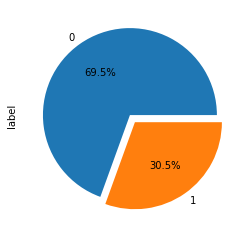

In [27]:
## let's see the target variable 
df['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')

In [26]:
df['label'].value_counts()

0    11196690
1     4920014
Name: label, dtype: int64

In [28]:
# compute additional meaningful features
df['Distance'] = df['Speed'] * df['second']
df['Acceleration'] = np.sqrt(np.power(df['acceleration_x'], 2) + np.power(df['acceleration_y'], 2) + np.power(df['acceleration_z'], 2))
df['Magnitude'] = np.sqrt(np.power(df['gyro_x'], 2) + np.power(df['gyro_y'], 2) + np.power(df['gyro_z'], 2))

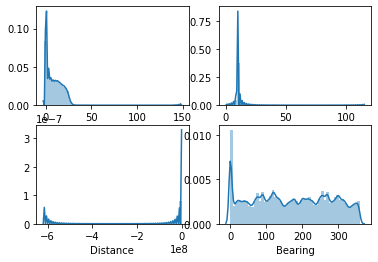

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i, column in enumerate(['Speed','Acceleration','Distance','Bearing']):
    sns.distplot(df[column],ax=axes[i//2,i%2])

C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\intan.septiana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


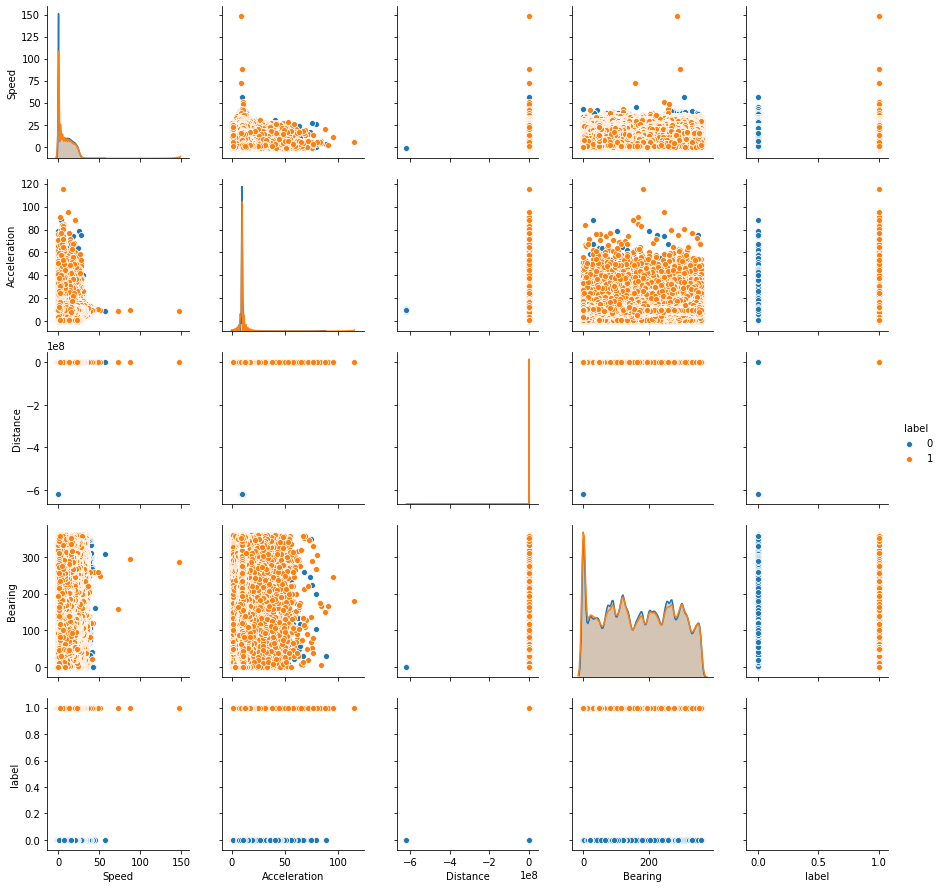

In [32]:
sns.pairplot(df[['Speed','Acceleration','Distance','Bearing','label']], hue="label")

In [33]:
def plot_corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})